# Project: Wrangling and Analyze Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#avd">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


### Question(s) for Analysis
- What dog status has the highest rating_ratio on average?
- What dog status has the highest favorite_count on average?
- What type of relationship or correlation exists between rating_ratio and favorite_count?
- What type of relationship or correlation exists between rating_ratio and retweet_count?

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import os
import requests
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import the already downloaded twitter archive.
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.content
with open("image_predictions.tsv", mode='wb') as f:
    f.write(response.content)

In [4]:
#import the image prediction dataset.
images_df = pd.read_csv('image_predictions.tsv', sep='\t')
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I had issues getting the Twitter API authentication  keys, so I made use of the tweet-json.txt file.

In [5]:
#Load the tweet-json.txt file using json and then retrieve the tweet_id, retweet_count and favorite_count.
api_tweets = []
with open('tweet-json.txt', encoding = 'utf-8') as f:
    lines = f.readlines()
    
for line in lines:
    tweet = json.loads(line)
    tweet_id = tweet["id"]
    retweet_count = tweet["retweet_count"]
    favorite_count = tweet["favorite_count"]
    api_tweets.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
    
tweets_df = pd.DataFrame(api_tweets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [6]:
tweets_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


<a id='assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues

1.Some of the records in the twitter_archive dataframe are retweets.

2.Some of the records in the twitter_archive dataframe are replies.

3.Invalid datatype for the tweet_id in all three dataframes and the timestamp column in the twitter_archive dataframe.

4.Some of the tweets in the twitter_archive dataframe are far beyond August 1st, 2017.

5.In the twitter_archive dataframe, some values in the rating_denominator are not 10.

6.In the twitter_archive dataframe, some values in the name column are 'a', 'an', 'one' 'this' where it should be 'None'.

7.In the twitter_archive dataframe, the columns rating_numerator and rating_denominator should be converted to one column ratings defining the rating ratio to effectively describe each dogs ratings and for analysis.

8.There are columns that are irrelevant to analysis in the twitter_archive dataframe and images_df dataframe. They are in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls for the twitter_archive dataframe and p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog for the images_df dataframe. Column p1 in images_clean is not a descriptive column name.

### Tidiness issues
1.In the twitter_archive dataframe, the columns doggo, floofer, pupper, and puppo should be one column as they all specify dog status.

2.The three dataframes should be one dataframe containing the tweet_ids and the corresponding attributes of each dog tweet which is present in all three dataframes.

### Programmatic Assessment

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive[twitter_archive['rating_numerator'] > 20 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [12]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
images_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
tweets_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
288,838476387338051585,NaN,NaN,2017-03-05 19:48:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Somehow he heard you tell him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838476387...,13,10,Stanley,None,None,None,None
1171,720415127506415616,NaN,NaN,2016-04-14 00:55:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Garden's coming in nice this year. 10/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720415127...,10,10,None,None,None,None,None
1473,693647888581312512,NaN,NaN,2016-01-31 04:11:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a pic without a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693647888...,7,10,None,None,None,None,None
1400,699446877801091073,NaN,NaN,2016-02-16 04:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699446877...,12,10,Archie,None,None,None,None
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,None,None,None,None
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None,None,None,None
1864,675362609739206656,NaN,NaN,2015-12-11 17:12:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She loves that shoe. Still no s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675362609...,12,10,Daisy,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None


In [17]:
twitter_archive[twitter_archive['name'] == 'a' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [18]:
twitter_archive[twitter_archive['name'] == 'an' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [19]:
twitter_archive[twitter_archive['name'] == 'this' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [20]:
twitter_archive[twitter_archive['name'] == 'one' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
924,755206590534418437,NaN,NaN,2016-07-19 01:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most inspirational stories ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755206590...,14,10,one,doggo,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None


In [21]:
images_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False
876,698262614669991936,https://pbs.twimg.com/media/CbC6JL_WEAI_PhH.jpg,1,Italian_greyhound,0.107948,True,basset,0.075230,True,Staffordshire_bullterrier,0.069436,True
1709,818145370475810820,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,1,golden_retriever,0.621931,True,Labrador_retriever,0.364997,True,redbone,0.003971,True
510,676146341966438401,https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg,1,Irish_water_spaniel,0.388332,True,standard_poodle,0.284121,True,greenhouse,0.034868,False
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
442,674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
828,693590843962331137,https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True


In [22]:
sum(twitter_archive.duplicated())

0

In [23]:
sum(images_df.duplicated())

0

In [24]:
sum(tweets_df.duplicated())

0

<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
images_clean = images_df.copy()
tweets_clean = tweets_df.copy()

### Issue #1:
Some of the records in the twitter_archive dataframe are retweets.

#### Define: 
Filter out records where the text column contains 'RT @' and then drop them.

#### Code

In [26]:
retweets = twitter_archive_clean[twitter_archive_clean['text'].str.contains('RT @')]

In [27]:
idx = list(retweets.index)

In [28]:
twitter_archive_clean = twitter_archive_clean.drop(idx)

#### Test

In [29]:
#Check that the retweets have been dropped successfully.
twitter_archive_clean[twitter_archive_clean['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:
Some of the records in the twitter_archive dataframe are replies.

#### Define
Filter out records where the in_reply_to_status_id column is null and assign that new dataframe to twitter_archive_clean.

#### Code

In [30]:
twitter_archive_clean =  twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [31]:
#Check that the replies have been dropped successfully.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #3:
Invalid datatype for the tweet_id in all three dataframes and the timestamp column in the twitter_archive dataframe.

#### Define
Convert the datatype of the tweet_id in the three dataframes to string and the datatype of the timestamp column from object(i.e. string) to datetime object.

#### Code

In [32]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

In [33]:
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].str[:-6]
twitter_archive_clean['timestamp'].head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

In [34]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [35]:
#Check that the datatypes have been successfully corrected.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

### Issue #4:
Some of the tweets in the twitter_archive dataframe are beyond August 1st, 2017.

#### Define
Filter out the records that are beyond August 1st, 2017.

#### Code

In [36]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['timestamp'] < pd.Timestamp('2017-08-01')]

#### Test

In [37]:
#Check that the tweets beyond August 1st, 2017 are not present anymore.
twitter_archive_clean[twitter_archive_clean['timestamp'] > pd.Timestamp('2017-08-01')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:
In the twitter_archive dataframe, some values in the rating_denominator are not 10.

#### Define
Replace every record in the rating_denominator column that is not 10 with 10.

#### Code

In [38]:
 twitter_archive_clean['rating_denominator'] = np.array(10)

#### Test

In [39]:
#Check that every value in the rating_denominator is 10.
twitter_archive_clean['rating_denominator'].value_counts()

10    2095
Name: rating_denominator, dtype: int64

### Issue #6:
In the twitter_archive dataframe, some values in the name column are 'a', 'an', 'one' or 'this' where it should be 'None'

#### Define
Replace records containing 'a', 'an', 'one', or 'this' to 'None'.

#### Code

In [40]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace([ 'a', 'an', 'one', 'this'], 'None')

#### Test

In [41]:
#Check that no value in the name column is a.
twitter_archive_clean[twitter_archive_clean['name'] == 'a' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
#Check that no value in the name column is an.
twitter_archive_clean[twitter_archive_clean['name'] == 'an' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
#Check that no value in the name column is one.
twitter_archive_clean[twitter_archive_clean['name'] == 'one' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
#Check that no value in the name column is this.
twitter_archive_clean[twitter_archive_clean['name'] == 'this' ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [45]:
twitter_archive_clean['name'].value_counts()

None        669
Charlie      11
Lucy         11
Oliver       10
Cooper       10
           ... 
Jonah         1
Fabio         1
Mookie        1
Mary          1
Berkeley      1
Name: name, Length: 950, dtype: int64

### Issue #7:
In the twitter_archive dataframe, the columns rating_numerator and rating_denominator should be converted to one column ratings defining the rating ratio to effectively describe each dogs ratings and for analysis.

#### Define
Create another column called rating_ratio that will be the division of the rating_numerator by the rating_denominator.

#### Code

In [46]:
twitter_archive_clean['rating_ratio'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

#### Test

In [47]:
#Check that the new column rating_ratio is present in the dataframe.
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_ratio
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1.3


In [48]:
#Check that the new column rating_ratio is present in the dataframe.
twitter_archive_clean['rating_ratio']

2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating_ratio, Length: 2095, dtype: float64

### Issue #8:
There are columns that are irrelevant to analysis in the twitter_archive dataframe and images_df dataframe. They are in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls for the twitter_archive dataframe and p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog for the images_df dataframe. Column p1 in images_clean is not a descriptive column name.

#### Define
Drop the irrelevant columns. Give column p1 a descriptive column name.

#### Code

In [49]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 
                                                    'in_reply_to_user_id', 
                                                    'source', 
                                                    'retweeted_status_id', 
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], axis = 1)

In [50]:
images_clean = images_clean.drop(['p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [51]:
#Rename the column p1 to dog_breed.
images_clean = images_clean.rename(columns = {'p1' : 'dog_breed'})

#### Test

In [52]:
#Check that irrelevant columns have been dropped.
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating_ratio'],
      dtype='object')

In [53]:
#Check that irrelevant columns have been dropped and that the column renaming has been successful.
images_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed'], dtype='object')

### Issue #9:
In the twitter_archive dataframe, the columns doggo, floofer, pupper, and puppo should be one column as they all specify dog status.

#### Define
Merge the four dog status columns into one column called dog_status.

#### Code

In [54]:
#Replace values of 'None' with NaN.
twitter_archive_clean['doggo'].replace('None', np.nan, inplace = True)
twitter_archive_clean['floofer'].replace('None', np.nan, inplace = True)
twitter_archive_clean['pupper'].replace('None', np.nan, inplace = True)
twitter_archive_clean['puppo'].replace('None', np.nan, inplace = True)

In [55]:
#Join the four redundant columns and separate the values by ', '.
twitter_archive_clean['dog_status'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ', '.join(x[x.notnull()]), 
                                                                                                           axis = 1)

In [56]:
#Finally, drop the redundant columns.
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [57]:
#Check for the prescence of the new dog_status column and the abscence of the redundant columns.
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating_ratio,dog_status
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,1.3,
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,1.3,


In [58]:
#Confirm that there's no duplicates as a result of the join.
sum(twitter_archive_clean['tweet_id'].duplicated())

0

In [59]:
#Check the value counts.
twitter_archive_clean['dog_status'].value_counts()

                  1759
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_status, dtype: int64

### Issue #10:
The three dataframes should be one dataframe containing the tweet_ids and the corresponding attributes of each dog tweet which is present in all three dataframes.

#### Define
Merge or Join the three dataframes on tweet_id.

#### Code

In [60]:
#First, merge twitter_archive_clean and images_clean.
twitter_archive_clean = pd.merge(twitter_archive_clean, images_clean, on = 'tweet_id', how = 'inner')

In [61]:
#Now, merge the merged twitter_archive_clean and tweets_clean.
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_clean, on = 'tweet_id', how = 'inner')

#### Test

In [62]:
#Check that all columns existing in the three dataframes is present in the merged dataframe.
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating_ratio,dog_status,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,1.2,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
1,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,1.3,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,8964,42908
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,1.2,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,1.3,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,3261,20562
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,1.3,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,2158,12041


In [63]:
#Check that all columns existing in the three dataframes is present in the merged dataframe.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1969 non-null   object        
 1   timestamp           1969 non-null   datetime64[ns]
 2   text                1969 non-null   object        
 3   rating_numerator    1969 non-null   int64         
 4   rating_denominator  1969 non-null   int32         
 5   name                1969 non-null   object        
 6   rating_ratio        1969 non-null   float64       
 7   dog_status          1969 non-null   object        
 8   jpg_url             1969 non-null   object        
 9   img_num             1969 non-null   int64         
 10  dog_breed           1969 non-null   object        
 11  retweet_count       1969 non-null   int64         
 12  favorite_count      1969 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int6

In [64]:
#Confirm that there are no duplicates as a result of the merge.
sum(twitter_archive_clean.duplicated())

0

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

<a id='avd'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### What dog status has the highest rating_ratio on average?

In [66]:
#Find the average rating_ratio and group by dog_status.
avg_dog_status_rating = twitter_archive_clean.groupby('dog_status')['rating_ratio'].mean().sort_values(ascending = False)
avg_dog_status_rating

dog_status
doggo, puppo      1.300000
                  1.242677
puppo             1.200000
floofer           1.200000
doggo             1.188889
doggo, pupper     1.100000
doggo, floofer    1.100000
pupper            1.071642
Name: rating_ratio, dtype: float64

### What dog status has the highest favorite_count on average?

In [67]:
#Find the average favorite_count and group by dog_breed.
avg_dog_status_likes = twitter_archive_clean.groupby('dog_status')['favorite_count'].mean().sort_values(ascending = False)
avg_dog_status_likes

dog_status
doggo, puppo      47844.000000
puppo             21582.090909
doggo             19356.380952
doggo, floofer    17169.000000
doggo, pupper     13219.875000
floofer           13206.000000
                   8493.742497
pupper             7250.527363
Name: favorite_count, dtype: float64

### What type of relationship or correlation exists between rating_ratio and favorite_count?

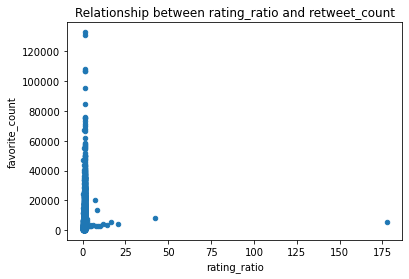

In [68]:
#Plot a scatterplot to show the relationship between rating_ratio and retweet_count.
twitter_archive_clean.plot(x='rating_ratio', y='favorite_count', kind='scatter');
plt.title('Relationship between rating_ratio and retweet_count');

From the above scatterplot, there is no correlation between rating_ratio and favorite_count.

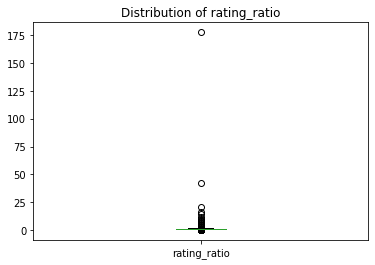

In [69]:
#The distribution of the rating_ratio column.
twitter_archive_clean['rating_ratio'].plot(kind='box');
plt.title('Distribution of rating_ratio');

Find the Outlier

In [70]:
#Get the value of the outlier.
twitter_archive_clean['rating_numerator'].max()

1776

In [71]:
#Find the exact record of the outlier.
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 1776]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating_ratio,dog_status,jpg_url,img_num,dog_breed,retweet_count,favorite_count
720,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776,10,Atticus,177.6,,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,2772,5569


In [72]:
twitter_archive_clean.rating_ratio.describe()

count    1969.000000
mean        1.222245
std         4.165518
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_ratio, dtype: float64

In [73]:
#Query the rating_ratio column to seperate into high and low rating_ratio using the median.
high_rating = twitter_archive_clean.query('rating_ratio > 1.100000')
low_rating = twitter_archive_clean.query('rating_ratio <= 1.100000')

In [74]:
#Find the average favorite_count of the high_rating and low_rating.
print('High rated dogs average favorite_count', high_rating.favorite_count.mean())
print('Low rated dogs average favorite_count', low_rating.favorite_count.mean())

High rated dogs average favorite_count 15977.864973262032
Low rated dogs average favorite_count 4597.8378378378375


### What type of relationship or correlation exists between rating_ratio and retweet_count?

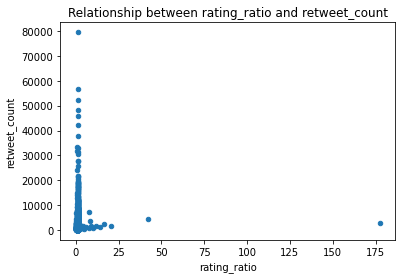

In [75]:
#Plot a scatterplot to show the relationship between rating_ratio and retweet_count.
twitter_archive_clean.plot(x='rating_ratio', y='retweet_count', kind='scatter');
plt.title('Relationship between rating_ratio and retweet_count');

From the above scatterplot, there is no correlation between rating_ratio and retweet_count.

In [76]:
#Find the average retweet_count of the high_rating and low_rating.
print('High rated dogs average retweet_count', high_rating.retweet_count.mean())
print('Low rated dogs average retweet_count', low_rating.retweet_count.mean())

High rated dogs average retweet_count 4737.729946524064
Low rated dogs average retweet_count 1579.8206388206388


### Insights:
1.The dog_status doggo, puppo has the highest average rating_ratio of 1.300000.

2.The dog_status doggo, puppo has the highest average favorite_count of 47844.000000.

3.From the analysis of question 3, highly rated dogs have a significantly lower favorite_count than low rated dogs. The fact that a dog is highly rated doesn't imply that it gets higher favorite_count.

4.From the analysis of question 4, highly rated dogs have a significantly higher retweet_count than low rated dogs.

### Visualization

#### Average rating_ratio by dog_status.

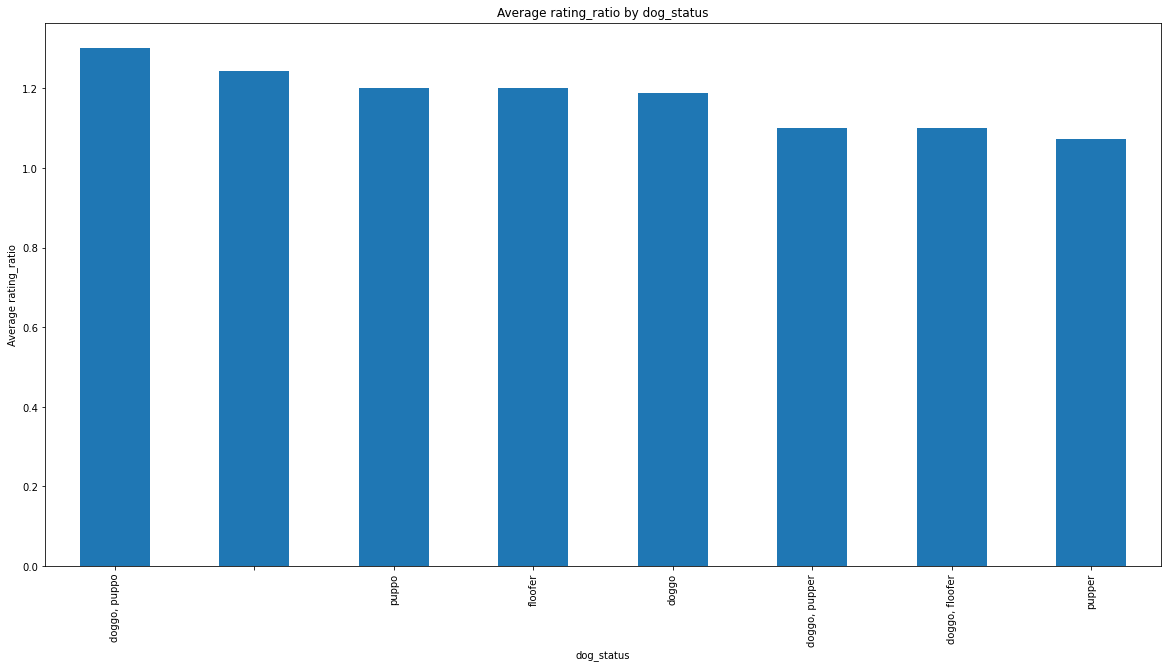

In [77]:
#Plot a bar chart of the avg_dog_status_rating.
avg_dog_status_rating.plot(kind = 'bar', figsize = (20, 10));
plt.xlabel('dog_status')
plt.ylabel('Average rating_ratio')
plt.title('Average rating_ratio by dog_status');
plt.savefig('Average rating_ratio by dog_status.png', bbox_inches = 'tight');

#### Average favorite_count by dog_status.

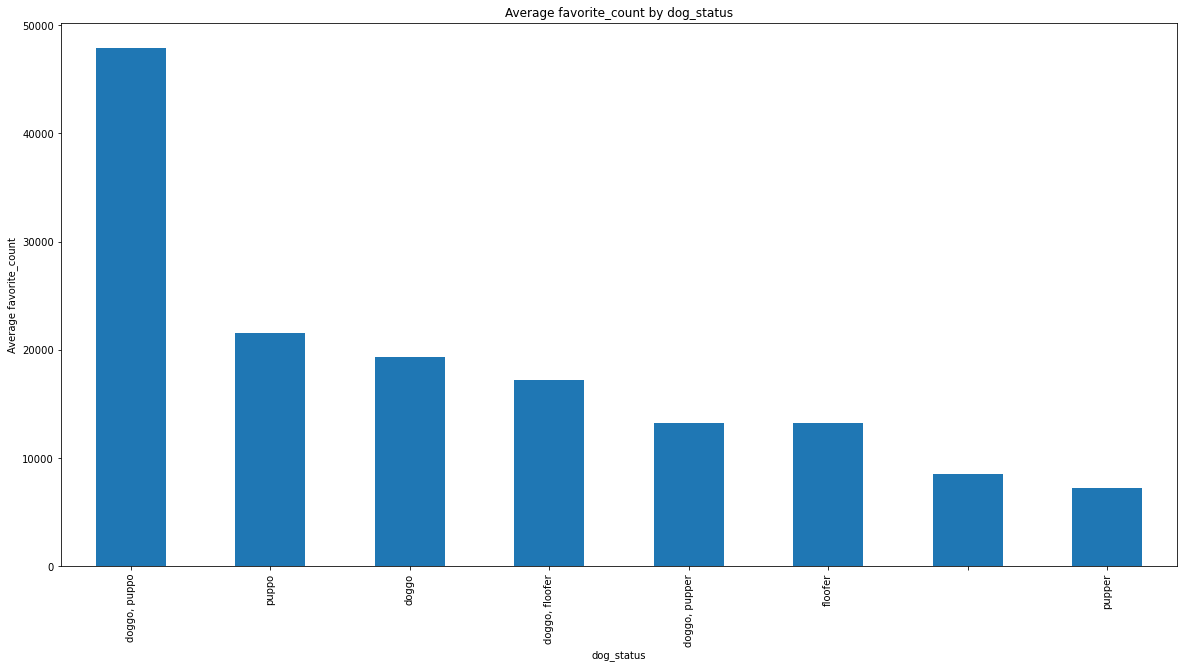

In [78]:
#Plot a bar chart of the avg_dog_status_likes.
avg_dog_status_likes.plot(kind = 'bar', figsize = (20, 10))
plt.xlabel('dog_status')
plt.ylabel('Average favorite_count')
plt.title('Average favorite_count by dog_status');
plt.savefig('Average favorite_count by dog_status.png', bbox_inches = 'tight');

#### Limitations and Further Research
The limitation of this analysis is that for the rating_numerator column in the twitter_archive dataframe, a signficant amount of the ratings were incorrect(outliers such as 1776 for tweet_id '749981277374128128'). Further data gathering to get the correct rating_numerator could improve this analysis.